In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors
import scipy as sc
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
import random
from matplotlib import cm
from ipywidgets import interact, interactive, fixed
import pandas as pd
import xarray as xr
# %matplotlib qt

### Using the following convention for toroidal coordinates

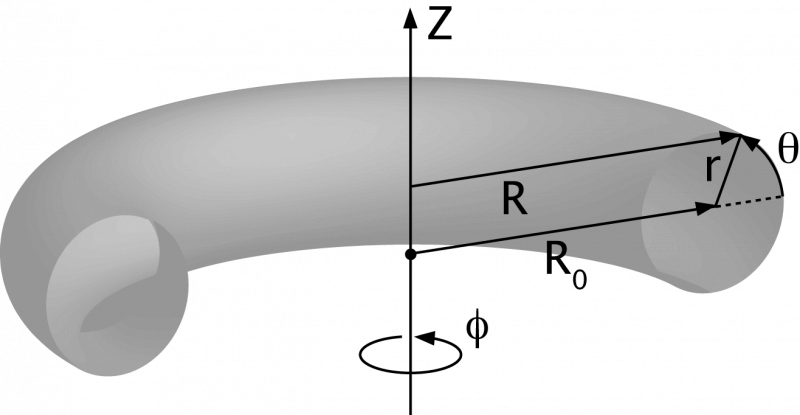

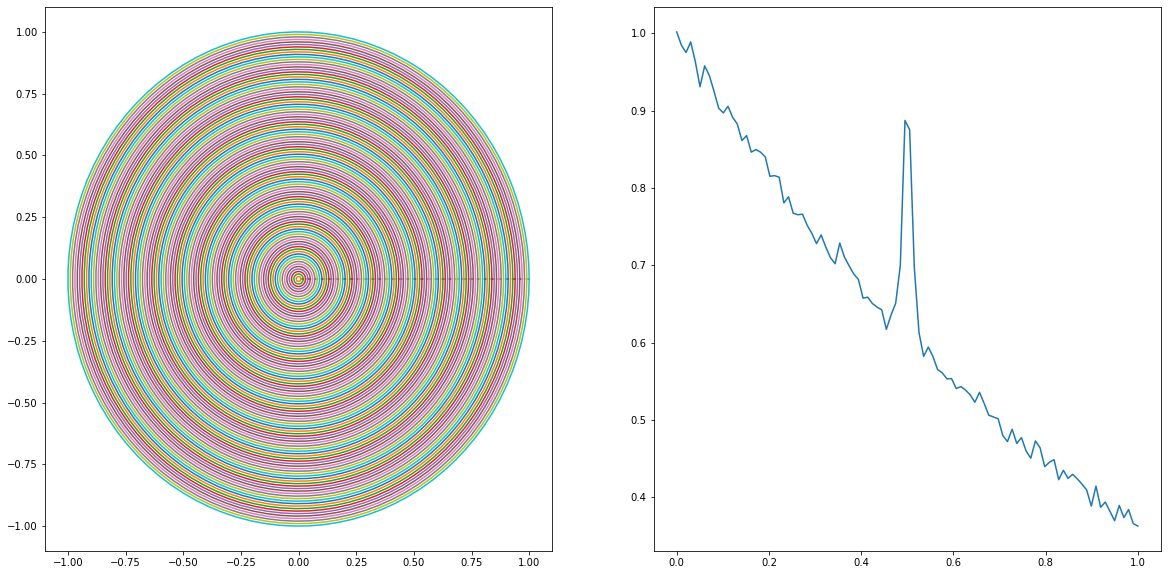

In [3]:
# 2D case

# define the grid and the density of grid points
n = 100
theta = np.linspace(0, 2.*np.pi, n)
r2d = np.linspace(0,1,n)
x2d = r2d*np.meshgrid(np.cos(theta), np.cos(theta))
y2d = r2d*np.meshgrid(np.sin(theta), np.sin(theta))

# a - amplitude
# b - rate
# r - radial grid
def pot_rad(a, b, r):
    return a*np.exp(-b*r)

# plot the density and the 2d grid
fig2d = plt.figure(figsize=(20,10))
ax2d = fig2d.add_subplot(121)
for i in range(2):
    ax2d.plot(x2d[i,:],y2d[i,:])

# a - amplitude
# b - rate
# r - radial grid
# with gaussian noise
def pot_rad_wgauss_noise(a, b, r):
    return a*np.exp(-b*r) + 0.01*a*np.random.normal(loc=0.0, scale=1.0, size=n)

# ax_pot2d.plot(r2d, pot_rad_wgauss_noise(a = 1, b = 1, r = r2d))

# a - amplitude
# b - rate
# r - radial grid
# with gaussian noise
# cp - center peak
# vp - variance peak
# hp - height peak
def pot_rad_gauss_peak(a, b, r, cp, vp, hp):
    return a*np.exp(-b*r) + hp*np.exp(-(r-cp)**2/(2*vp)) + 0.01*a*np.random.normal(loc=0.0, scale=1.0, size=n)

ax_pot2d = fig2d.add_subplot(122)
ax_pot2d.plot(r2d, pot_rad_gauss_peak(a = 1, b = 1, r = r2d, cp = 0.5, vp = 0.0001, hp = 0.3))

In [4]:
# %matplotlib notebook
n = 200

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, np.ones(n)
# c, a = np.linspace(0,2,n), np.linspace(0,1,n)
x3d = (c + a*np.cos(theta)) * np.cos(phi)
y3d = (c + a*np.cos(theta)) * np.sin(phi)
z3d = a * np.sin(theta)

"radii of a slice of the torus"
r3d = np.sqrt((x3d)**2 + (y3d)**2 + z3d**2) - c/2 - a

In [5]:
# a - amplitude
# b - rate
# r - radial grid
# with gaussian noise
# cp - center peak
# vp - variance peak
# hp - height peak
# 3d version of the potential with gaussian noise and a peak
def pot_rad_gauss_peak3d(a, b, r, cp, vp, hp):
    return a*np.exp(-b*r) + hp*np.exp(-(r-cp)**2/(2*vp)) + 0.01*a*np.random.normal(loc=0.0, scale=1.0, size=np.shape(r))

#plot of the potential and the grid
pot3d = pot_rad_gauss_peak3d(a = 1, b = 1, r = np.sqrt(r3d**2), cp = 0.5, vp = 0.0002, hp = 0.3)


# Plot the surface.
def change_ang(azi, elev):
    fig3d = plt.figure(figsize=(20,10))
    ax3d = fig3d.add_subplot(121, projection='3d')
    ax3d.set_zlim(-1,1)
    ax3d.view_init(azim = azi, elev=elev)
    surf3d = ax3d.plot_surface(x3d, y3d, pot3d, 
                            cmap=cm.twilight,
                            linewidth=0, 
                            antialiased=False)
    ax3d.set_xlabel("$x[m]$")
    ax3d.set_ylabel("$y[m]$")
    ax3d.set_zlabel("$\\phi(\\mathbf{r})$")
    ax3d.set_title("3D plot of 2D potential")
elev_3dpot = widgets.IntSlider(min = -30, max = 90, step = 1, value = 40)
azim_3dpot = widgets.IntSlider(min = 0, max = 360, step = 1, value = 0)
interact(change_ang,  azi = azim_3dpot, elev = elev_3dpot)

interactive(children=(IntSlider(value=0, description='azi', max=360), IntSlider(value=40, description='elev', …

<function __main__.change_ang(azi, elev)>

In [6]:
#plot the projection of the 3d potential in 2d for initial angle and init angle + 180 degrees
angle_t = widgets.IntSlider(min=0, max=n-1, step=10, value=0)
def plot_2dproj_pot(i):
    figproj3dto2d = plt.figure(figsize = (20, 10))
    axproj1 = figproj3dto2d.add_subplot(121)
    axproj1.set_title("2D potential at left intersection at $\\theta = %f$"%(i*360/(2*n)))
    axproj1.plot(r3d[i][:int(n/2)], pot3d[i][:int(n/2)])
    axproj1.set_xlabel("$r[m]$")
    axproj1.set_ylabel("$\\phi(\\mathbf{r})$")

    axproj2 = figproj3dto2d.add_subplot(122)
    axproj2.set_title("2D potential right intersection at $\\theta = %f$"%(180 + i*360/(2*n)))
    axproj2.plot(r3d[i][(int(n/2) + 1):], pot3d[i][(int(n/2) + 1):])
    axproj2.set_xlabel("$r[m]$")
    axproj2.set_ylabel("$\\phi(\\mathbf{r})$")
    
#     axproj3 = figproj3dto2d.add_subplot(221)
#     axproj3.plot(r3d[:,i][:int(n/2)], pot3d[:,i][:int(n/2)])
    
#     axproj4 = figproj3dto2d.add_subplot(222)
#     axproj4.plot(r3d[:,i][:int(n/2)], pot3d[:,i][:int(n/2)])

    
interact(plot_2dproj_pot, i = angle_t)

interactive(children=(IntSlider(value=0, description='i', max=199, step=10), Output()), _dom_classes=('widget-…

<function __main__.plot_2dproj_pot(i)>

In [7]:
#Making a poloidal intersection of the vector field
n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta3d, phi3d = np.meshgrid(theta, phi)

c, a = 2, np.linspace(1e-3,1, n)

R_grid3d, theta3d, phi3d = np.meshgrid(a, np.linspace(0,2*np.pi, n, endpoint = False), 
                                                    np.linspace(0,2*np.pi, n, endpoint = False), indexing="ij")
n
x3d = (c + R_grid3d*np.cos(theta3d)) * np.cos(phi3d)
y3d = (c + R_grid3d*np.cos(theta3d)) * np.sin(phi3d)
z3d = R_grid3d * np.sin(theta3d)

"""
The dimensions represents:
1. The radius index.
2. The theta index.
3. The phi index.

The point is to plot a grid 
generated by a set of radii 
at a fixed toroidal angle (fixed theta) 
for every poloidal angle (phi).

The minor radius a constites a list of radii.
The major radius c is just a constant.
"""

"Creating the grid for r centered at zero (thats why the x coords are shifted)"

# r3d = np.zeros((n, n, n))
r3d = np.sqrt( (x3d - x3d[0])**2 + (y3d - y3d[0])**2 + z3d**2 ) 
pot3d = pot_rad_gauss_peak3d(a = 1, b = 1, r = np.sqrt(r3d**2), cp = 0.5, vp = 0.0002, hp = 0.3)
print(np.shape(pot3d))

(100, 100, 100)


In [8]:
def polint_interact(i):
    fig_2dproj_polint = plt.figure(figsize=(20,10))
    ax_2dproj_polint = fig_2dproj_polint.add_subplot(121)
    ax_2dproj_polint.scatter(np.sqrt(x3d[:,:,i][::5]**2 + y3d[:,:,i][::5]**2) - c, z3d[:,:,i][::5])
    ax_2dproj_polint.set_title("Toroidal intersection of grid at $\\phi %f^{\\circ}$"%(i*360/n))
    ax_2dproj_polint.set_xlabel("$r[m]$")
    ax_2dproj_polint.set_ylabel("$z[m]$")
    

    ax_2dproj_cont = fig_2dproj_polint.add_subplot(122)
    c2dproj = ax_2dproj_cont.contourf(np.sqrt(x3d[:,:,i]**2 + y3d[:,:,i]**2) - c, z3d[:,:,i], pot3d[:,:,i])
    ax_2dproj_cont.set_title("Contour plot of potential $\\Phi(r)$")
    ax_2dproj_cont.set_xlabel("$r[m]$")
    ax_2dproj_cont.set_ylabel("$z[m]$")
    fig_2dproj_polint.colorbar(c2dproj)

idx_polint_cont = widgets.IntSlider(min = 0, max = n-1, step = 1, value = 0)
interact(polint_interact,  i = idx_polint_cont)

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

<function __main__.polint_interact(i)>

## Structure of the electric field

The potential $\mathbf{\Phi}$ where $\Phi_{ijk}$ is the value of the potential at coordinate $\mathbf{r} = (r_i, r_j, r_k)$ which gives the following structure for the potential where $i,j,k \in (1,n)$:

\begin{equation}
    \mathbf{ \Phi_{i} }= \begin{pmatrix}\mathbf{\Phi_{i1} }\\
    \vdots \\
    \mathbf{\Phi_{ij} }\\
    \vdots \\ 
    \mathbf{\Phi_{in} }\end{pmatrix}
\end{equation}

where each $\mathbf{\Phi_{ij} }$ is given by the vector:
\begin{equation}
    \mathbf{ \Phi_{ij} }= \begin{pmatrix}\Phi_{ij1 }\\
    \vdots \\
    \Phi_{ijk } \\
    \vdots \\ 
    \Phi_{ijn } \end{pmatrix}
\end{equation}

The electric field is given by $\mathbf{E}(\mathbf{r}) = -\nabla\mathbf{\Phi}$ which is structured as follows:
\begin{equation}
    E_{ijk}(\mathbf{r}) = (E_{ijk,i}, E_{ijk,j}, E_{ijk,k}) = E_{r_i}(\mathbf{r})\hat{r_i} + E_{r_j}(\mathbf{r})\hat{r_j} + E_{r_k}(\mathbf{r})\hat{r_k}
\end{equation}

where the subnotation $ijk,i$ means the value of the component in $i$ direction at coordinate $\mathbf{r} = (r_i, r_j, r_k)$.

In the following sections the coordinates system used are:
1. Toroidal coordinates $(r_i, r_j, r_k) = (R - c, \theta, \phi)$.
2. Cylindrical coordinates $(r_i, r_j, r_k) = (r, \phi, z)$.
3. Cartesian $(r_i, r_j, r_k) = (x, y, z)$.

Using the following convention for the cylindrical coordinates:
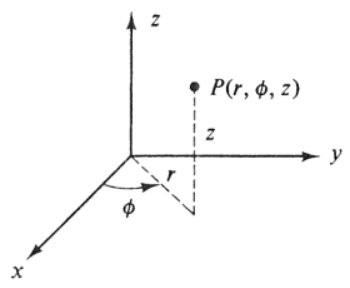

where the angle in the $(r, z)$-plane is the angle $\theta$.

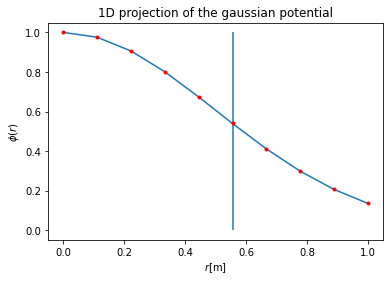

Emax at r [0.55555556]
[[[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]]

 [[0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112]
  [0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112]
  [0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112]
  [0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112]
  [0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112]
  [0.112 0.112 

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.efield_test1_interact_anal(i)>

In [9]:
# Test 1: Check the grad scheme
n_grid = 10

def test1_pot(r, z):
    return np.exp(-(r**2 + z**2))


#given in cylindrical coordinates
def test1_field(r,z):
    field = np.zeros((3,) + np.shape(r))
    field[0] = 2*r*np.exp(-(r**2 + z**2))
    field[2] = 2*z*np.exp(-(r**2 + z**2))
    return field


"""
Making a 1d plot of the gaussian potential to confirm 
that the analytical expression is reasonable.
"""
r_t1_1d = np.linspace(0,1,n_grid)
pot1d_t1 = test1_pot(r_t1_1d, r_t1_1d)
efield_t1 = np.gradient(-pot1d_t1)

emax_t1 = np.max(efield_t1)
idx_emax_t1 = np.where(efield_t1 == emax_t1)[0]
plt.figure()
plt.title("1D projection of the gaussian potential")
plt.plot(r_t1_1d, pot1d_t1)
plt.plot(r_t1_1d, pot1d_t1, 'r.')
plt.vlines(r_t1_1d[idx_emax_t1], ymin = 0, ymax = 1)
plt.xlabel("$r[\mathrm{m}]$")
plt.ylabel("$\\phi(r)$")
plt.show()

print("Emax at r", r_t1_1d[idx_emax_t1])


"""
Make the 3D grid for the problem and calculate the potential 
and el field for the 3D grid. 
Further project the calculations in 2D.

For cartesian coordinates the dimensions represents:
1. The radius index.
2. The theta index.
3. The phi index.

The point is to plot a grid 
generated by a set of radii 
at a fixed toroidal angle (fixed theta) 
for every poloidal angle (phi).

The minor radius a constites a list of radii.
The major radius c is just a constant.
"""
c_t1, a_t1 = 2, np.linspace(0.001,1, n_grid)

R_grid_t1, theta_grid_t1, phi_grid_t1 = np.meshgrid(a_t1, np.linspace(0,2*np.pi, n_grid, endpoint = False), 
                                                    np.linspace(0,2*np.pi, n_grid, endpoint = False), indexing="ij")
print(R_grid_t1)
x3_t1 = (c_t1 + R_grid_t1*np.cos(theta_grid_t1)) * np.cos(phi_grid_t1)
y3_t1 = (c_t1 + R_grid_t1*np.cos(theta_grid_t1)) * np.sin(phi_grid_t1)
z3_t1 = R_grid_t1 * np.sin(theta_grid_t1)

# Calclulating the analytical potential and the electric field
pot_t1 = test1_pot(r = np.sqrt((x3_t1)**2 + (y3_t1)**2)-c_t1, z = z3_t1)
efield_t1_anal = test1_field(r = np.sqrt((x3_t1)**2 + (y3_t1)**2)-c_t1, z = z3_t1)
"""
Note that we have to do a transform from polar/cylindrical coordinates 
to cartesian coordinates to get the cartiesian components of the field.
"""
def calc_efield_npgrad(pot, theta_func, phi_func, R_func, R0, n):
    efield_cart = np.zeros((3,) + np.shape(pot))
    # (r, phi, z)
    efield_cyl = np.zeros((3,) + np.shape(pot))
    
    dR = R_func[1,0,0] - R_func[0,0,0]
    dtheta = theta_func[0,1,0] - theta_func[0,0,0]
    dphi = phi_func[0,0,1] - phi_func[0,0,0]
    print("dR", dR)
    print("dtheta", dtheta)
    print("dphi", dphi)
    efield_tor = np.asarray(np.gradient(-pot, dR, dtheta, dphi)) # unit vectors in [0,1,2] = (r, theta, phi)
    
    efield_tor_R = efield_tor[0]
    efield_tor_theta = np.multiply(efield_tor[1],R_func)
    efield_tor_phi = np.multiply(efield_tor[2],(R0 + R_func*np.cos(theta_func)) )
    
    efield_tor[1] = efield_tor_theta
    efield_tor[2] = efield_tor_phi
#     print("efield_tor[2]", efield_tor[2])
#     print("efield_tor_phi", efield_tor_phi)
    # Transformation from polar to cartesian and cylindrical unit vectors
    # note coord in cart coord with torus idx (0,1,2) = (R, theta, phi)
    rhat = efield_tor_R*np.cos(theta_func) - efield_tor_theta*np.sin(theta_func)
    zhat = efield_tor_R*np.sin(theta_func) + efield_tor_theta*np.cos(theta_func)
    
    xhat = rhat*np.cos(phi_func) - efield_tor_phi*np.sin(phi_func)
    yhat = rhat*np.sin(phi_func) + efield_tor_phi*np.cos(phi_func)
    efield_cart[0] = np.asarray(xhat)
    efield_cart[1] = np.asarray(yhat)
    efield_cart[2] = np.asarray(zhat)
    efield_cyl[0] = np.asarray(rhat)
    efield_cyl[1] = np.asarray(efield_tor_phi)
    efield_cyl[2] = np.asarray(zhat)
    return efield_cart, efield_cyl
    

# calculate the electric field with np.gradient
efield_t1_cart, efield_t1_cyl = calc_efield_npgrad(pot = pot_t1, 
                                                   theta_func = theta_grid_t1, 
                                                   phi_func = phi_grid_t1, 
                                                   R_func = np.sqrt((np.sqrt(x3_t1**2 + y3_t1**2)-c_t1)**2 + z3_t1**2), 
                                                   R0 = c_t1, 
                                                   n = n_grid)

#Plotting the vector field and the contour
angles_t1 = np.linspace(0,360, n_grid)
def efield_test1_interact(i):
    fig_test1 = plt.figure(figsize=(20,10))
    ax_2dproj_test1 = fig_test1.add_subplot(121)
    ax_2dproj_test1.set_title("Toroidal intersection of numerical $E(\\mathbf{r})$ at $\\phi = %f^{\\circ}$"%angles_t1[i])
    ax_2dproj_test1.set_xlabel("$r[m]$")
    ax_2dproj_test1.set_ylabel("$z[m]$")
    # Using np.grad
    vecs_t1 = ax_2dproj_test1.quiver(np.sqrt((x3_t1[:,:,i] )**2 + (y3_t1[:,:,i])**2)-c_t1, z3_t1[:,:,i],
                                     efield_t1_cyl[0, :, :, i], efield_t1_cyl[2, :, :, i],
                                     np.sqrt(np.sum(efield_t1_cyl[:,:,:,i]**2, axis = 0)))
    fig_test1.colorbar(vecs_t1)
    ax_2dproj_test1_cont = fig_test1.add_subplot(122)
    cont_t1 = ax_2dproj_test1_cont.contourf(np.sqrt(x3_t1[:,:,i]**2 + y3_t1[:,:,i]**2) - c_t1, z3_t1[:,:,i], pot_t1[:,:,i])
    ax_2dproj_test1_cont.set_title("Contour plot of potential $\\Phi(r)$")
    ax_2dproj_test1_cont.set_xlabel("$r[m]$")
    ax_2dproj_test1_cont.set_ylabel("$z[m]$")
    fig_test1.colorbar(cont_t1)


idx_t1 = widgets.IntSlider(min = 0, max = n_grid-1, step = 1, value = 0)
interact(efield_test1_interact,  i = idx_t1)

def efield_test1_interact_anal(i):
    fig_test1 = plt.figure(figsize=(20,10))
    ax_2dproj_test1 = fig_test1.add_subplot(121)
    ax_2dproj_test1.set_title("Toroidal intersection of analytical $E(\\mathbf{r})$ at $\\phi = %f^{\\circ}$"%angles_t1[i])
    ax_2dproj_test1.set_xlabel("$r[m]$")
    ax_2dproj_test1.set_ylabel("$z[m]$")
#     # Using analytical sol
    vecs_an_t1 = ax_2dproj_test1.quiver(np.sqrt((x3_t1[:,:,i] )**2 + (y3_t1[:,:,i])**2) - c_t1, z3_t1[:,:,i],
                           efield_t1_anal[0, :, :, i], efield_t1_anal[2, :, :, i],
                           np.sqrt(np.sum(efield_t1_anal[:,:,:, i]**2, axis = 0)))
    fig_test1.colorbar(vecs_an_t1)
    ax_2dproj_test1_cont = fig_test1.add_subplot(122)
    cont_t1 = ax_2dproj_test1_cont.contourf(np.sqrt(x3_t1[:,:,i]**2 + y3_t1[:,:,i]**2) - c_t1, z3_t1[:,:,i], pot_t1[:,:,i])
    ax_2dproj_test1_cont.set_title("Contour plot of potential $\\Phi(r)$")
    ax_2dproj_test1_cont.set_xlabel("$r[m]$")
    ax_2dproj_test1_cont.set_ylabel("$z[m]$")
    fig_test1.colorbar(cont_t1)


idx_t1_anal = widgets.IntSlider(min = 0, max = n_grid-1, step = 1, value = 0)
interact(efield_test1_interact_anal,  i = idx_t1_anal)

In [10]:
efield_polint_cart, efield_polint_cyl = calc_efield_npgrad(pot = pot3d, 
                                                           theta_func = theta3d, 
                                                           phi_func = phi3d, 
#                                                            R_func = np.sqrt((np.sqrt(x3d**2 + y3d**2)-c)**2 + z3d**2),
                                                           R_func = R_grid3d,
                                                           R0 = c,
                                                           n = n)
print("Shape final efield", np.shape(efield_polint_cart))

dR 0.010090909090909091
dtheta 0.06283185307179587
dphi 0.06283185307179587
Shape final efield (3, 100, 100, 100)


In [11]:
angles_toy = np.linspace(0,360, n)
def efield_polint_interact(i):
    fig_2dproj_polint = plt.figure(figsize=(15,12))    
    ax_2dproj_vec = fig_2dproj_polint.add_subplot()
#     ax_2dproj_vec.scatter(np.sqrt(x3d[:,i][::5]**2 + y3d[:,i][::5]**2), z3d[:,i][::5])
    v2dproj = ax_2dproj_vec.quiver(np.sqrt(x3d[:,:,i]**2 + y3d[:,:,i]**2), z3d[:,:,i],      #coords
                                    efield_polint_cyl[0, :, :, i],                         #xy comp
                                    efield_polint_cyl[2, :, :, i],                         #z comp
                                    np.sqrt(np.sum(efield_polint_cyl[:, :, :, i]**2, axis = 0)))       #magn
    ax_2dproj_vec.set_title("Vector field plot of $E(\\mathbf{r})$ at $ \\phi = %f^{\\circ}$"%angles_toy[i])
    ax_2dproj_vec.set_xlabel("$r[m]$")
    ax_2dproj_vec.set_ylabel("$z[m]$")
    fig_2dproj_polint.colorbar(v2dproj)

idx_polint_cont = widgets.IntSlider(min = 0, max = n-1, step = 1, value = 0)
interact(efield_polint_interact,  i = idx_polint_cont)

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

<function __main__.efield_polint_interact(i)>

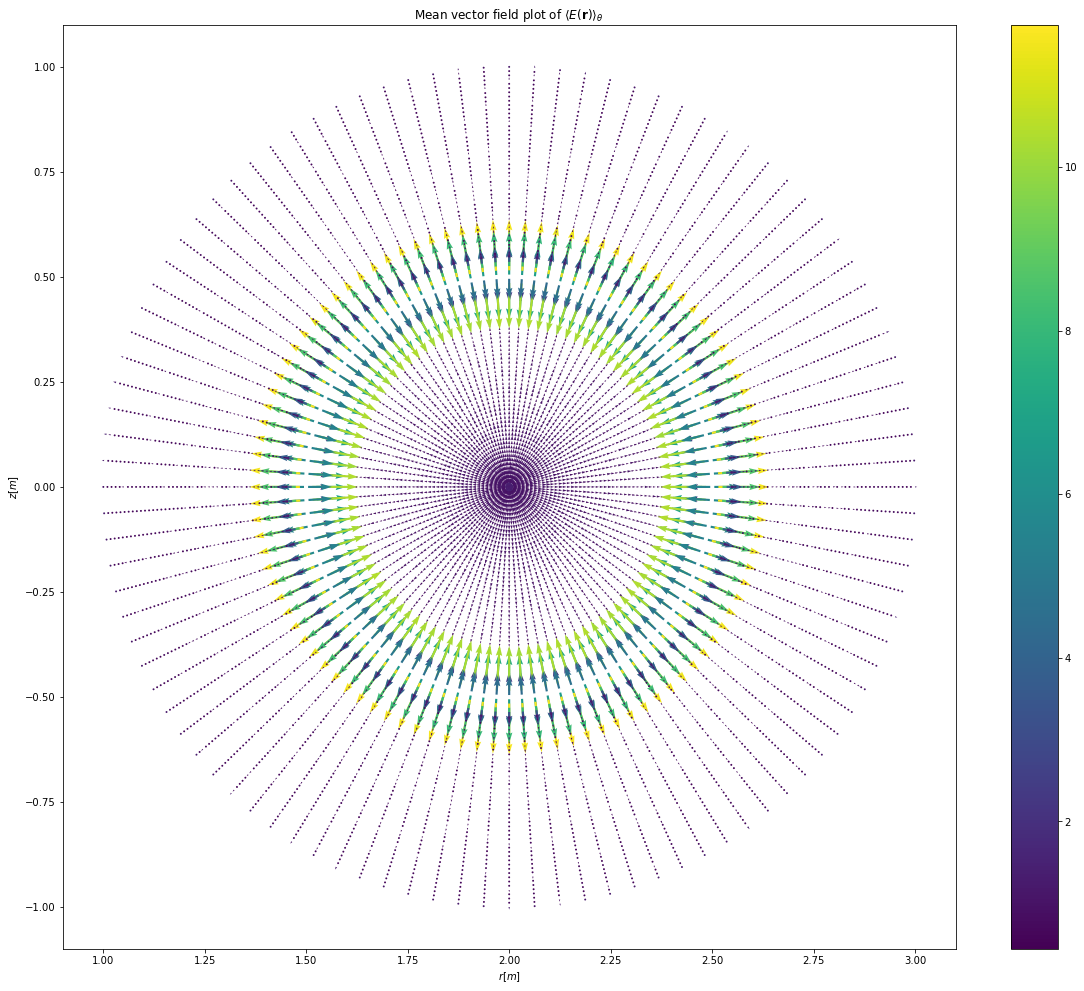

In [12]:
"""
The idea here is to get a smoother plot of the E field by taking the mean over all toroidal angles.
This can be done because the only toroidally dependent term is the gaussian noise with mean zero added to the potential.
Taking the mean could then be intepreted as removing the noise.
"""

fig_2dproj_polint = plt.figure(figsize=(20,17))    
ax_2dproj_vec = fig_2dproj_polint.add_subplot()
v2dproj = ax_2dproj_vec.quiver(np.sqrt(x3d[:,:,0]**2 + y3d[:,:,0]**2), z3d[:,:,0],              #coords
                                np.mean(efield_polint_cyl[0], axis = 2),                                        #xy comp
                                np.mean(efield_polint_cyl[2], axis = 2),                                        #z comp
                                np.mean(np.sqrt(efield_polint_cyl[0]**2 + efield_polint_cyl[2]**2), axis = 2)) #magn
ax_2dproj_vec.set_title("Mean vector field plot of $\\langle E(\\mathbf{r}) \\rangle_{\\theta}$")
ax_2dproj_vec.set_xlabel("$r[m]$")
ax_2dproj_vec.set_ylabel("$z[m]$")
fig_2dproj_polint.colorbar(v2dproj)

In [13]:
"""
The point with this cell is to illustrate how the np.gradient function works with an easy input.
"""

xyzplane = [[[ 0., 6., 12., 18., 24., 30.], [ 1., 7., 13., 19., 25., 31.], [ 2., 8., 14., 20., 26., 32.], 
           [ 3., 9., 15., 21., 27., 33.], [ 4., 10., 16., 22., 28., 34.], [ 5., 11., 17., 23., 29., 35.]], 
           [[ 0., 6., 12., 18., 24., 30.], [ 1., 7., 13., 19., 25., 31.], [ 2., 8., 14., 20., 26., 32.], 
           [ 3., 9., 15., 21., 27., 33.], [ 4., 10., 16., 22., 28., 34.], [ 5., 11., 17., 23., 29., 35.]],
           [[ 0., 6., 12., 18., 24., 30.], [ 1., 7., 13., 19., 25., 31.], [ 2., 8., 14., 20., 26., 32.], 
           [ 3., 9., 15., 21., 27., 33.], [ 4., 10., 16., 22., 28., 34.], [ 5., 11., 17., 23., 29., 35.]],
           [[ 0., 6., 12., 18., 24., 30.], [ 1., 7., 13., 19., 25., 31.], [ 2., 8., 14., 20., 26., 32.], 
           [ 3., 9., 15., 21., 27., 33.], [ 4., 10., 16., 22., 28., 34.], [ 5., 11., 17., 23., 29., 35.]],
           [[ 0., 6., 12., 18., 24., 30.], [ 1., 7., 13., 19., 25., 31.], [ 2., 8., 14., 20., 26., 32.], 
           [ 3., 9., 15., 21., 27., 33.], [ 4., 10., 16., 22., 28., 34.], [ 5., 11., 17., 23., 29., 35.]],
           [[ 0., 6., 12., 18., 24., 30.], [ 1., 7., 13., 19., 25., 31.], [ 2., 8., 14., 20., 26., 32.], 
           [ 3., 9., 15., 21., 27., 33.], [ 4., 10., 16., 22., 28., 34.], [ 5., 11., 17., 23., 29., 35.]]]

for i in range(len(xyzplane)):
    for j in range(len(xyzplane[0])):
        xyzplane[i][j] = np.asarray(xyzplane[i][j])
    xyzplane[i] = np.asarray(xyzplane[i])
xyzplane = np.asarray(xyzplane)
# print(np.shape(xyzplane))
"""Clearly the gradient 'in rows' is 6 everywhere."""

"""So if grad=numpy.gradient(xyplane) and it says that grad[0] is the gradient 
'in rows' then it should be 6 everywhere. however it is 1, 
which is the gradient 'in columns'.
"""
grad = np.gradient(xyzplane)
# print("\n\n grad[0] \n\n", grad[0], "\n\n grad[1] \n\n", grad[1], "\n\n grad[2] \n\n", grad[2])

"""Conclusion is that grad[0] represents the difference between the entries with structure [[]], grad[1] between
entries with structure [], and grad[2] between entries in the inner list"""

# print(np.sqrt((np.sqrt(x3d**2 + y3d**2) - c)**2 + z3d**2))

'Conclusion is that grad[0] represents the difference between the entries with structure [[]], grad[1] between\nentries with structure [], and grad[2] between entries in the inner list'

dR 0.111
dtheta 0.6283185307179586
dphi 0.6283185307179586
error_t2_L2 0.03725591425654883 

 ------------------- 


shape efield_t2_num[:, ::Nskip, ::Nskip, ::Nskip] (3, 10, 10, 10)
dR 0.05257894736842105
dtheta 0.3141592653589793
dphi 0.3141592653589793
error_t2_L2 0.012524557604734221 

 ------------------- 


shape efield_t2_num[:, ::Nskip, ::Nskip, ::Nskip] (3, 10, 10, 10)
dR 0.020387755102040817
dtheta 0.12566370614359174
dphi 0.12566370614359174
error_t2_L2 0.003072973148574805 

 ------------------- 


shape efield_t2_num[:, ::Nskip, ::Nskip, ::Nskip] (3, 10, 10, 10)
dR 0.010090909090909091
dtheta 0.06283185307179587
dphi 0.06283185307179587
error_t2_L2 0.0010754027928177598 

 ------------------- 


shape efield_t2_num[:, ::Nskip, ::Nskip, ::Nskip] (3, 10, 10, 10)
dR 0.005020100502512563
dtheta 0.031415926535897934
dphi 0.031415926535897934
error_t2_L2 0.00037827177299191436 

 ------------------- 


shape efield_t2_num[:, ::Nskip, ::Nskip, ::Nskip] (3, 10, 10, 10)


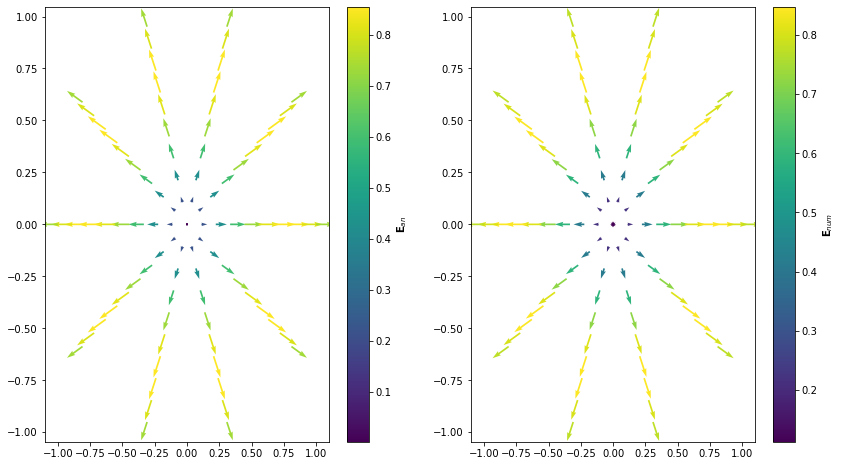

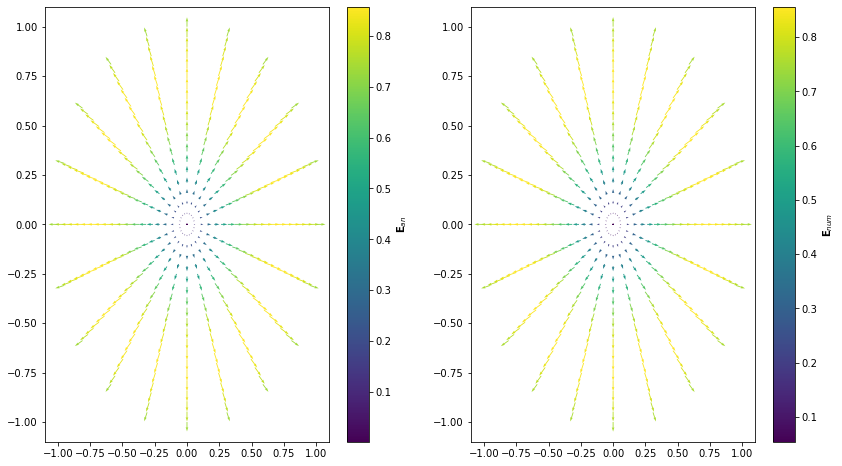

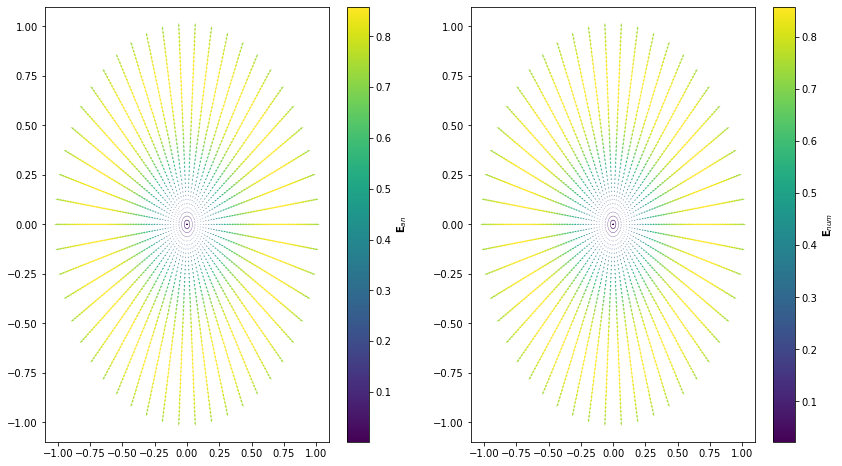

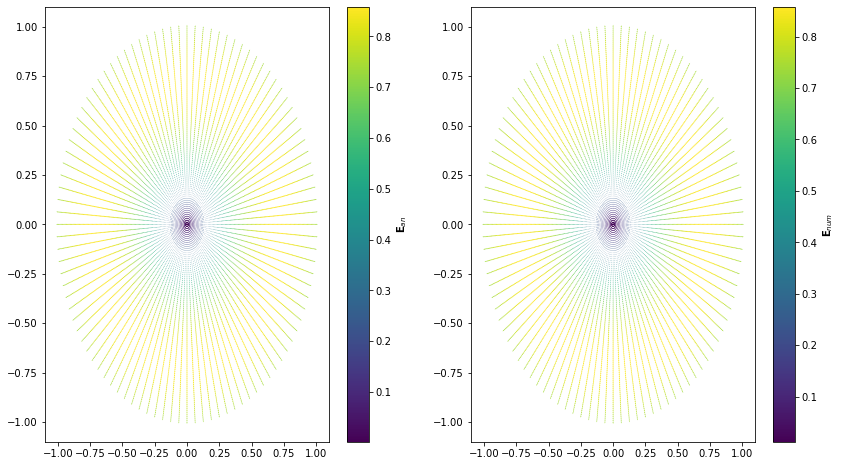

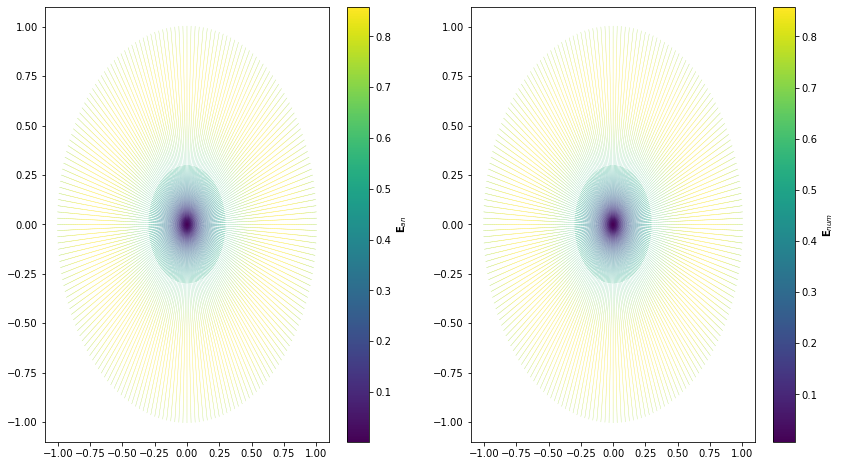

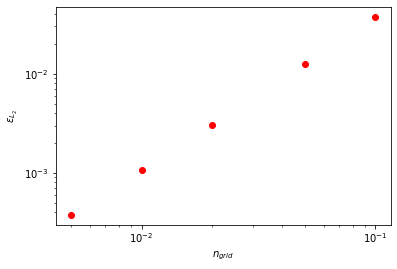

In [14]:
"""
# Test 2: The Method of Manufactured Solutions (MMS) 
# for Code Verification using the test2 case as the example.


The key idea here is to check your code for errors when for instance calculating the derivative.
The comparison can only be done if you have an analytical solution to the problem.
The comparison is done by taking the L2 norm of the difference between the numerical and analytical solution.
In this particular problem the strategy is the following:
1. Check if the difference stays within a reasonable threshold when moving towards regions of the grid where the
grid spacing is less dense.
2. Check if the difference is not affected by a non-symmetric potential in the poloidal direction.
3. Add a toroidal term to the potential and see if the difference is affected by this.
4. See how grid spacing affects the devation from the analytical solution.
"""

#1.1: Calculating the difference:
n_grid_t2 = [10,20,50,100,200]
n_grid_t2 = np.asarray(n_grid_t2)
def MMS_sympot(ngrid, ncomparison):
    Nskip = int(ngrid/ncomparison)
    
    c_t2, a_t2 = 2, np.linspace(0.001,1, ngrid)

    R_grid, theta_grid, phi_grid = np.meshgrid(a_t2, 
                                               np.linspace(0,2*np.pi, ngrid, endpoint = False), 
                                               np.linspace(0,2*np.pi, ngrid, endpoint = False), 
                                               indexing="ij")

    x3_t2 = (c_t2 + R_grid*np.cos(theta_grid)) * np.cos(phi_grid)
    y3_t2 = (c_t2 + R_grid*np.cos(theta_grid)) * np.sin(phi_grid)
    z3_t2 = R_grid * np.sin(theta_grid) 

    # Calclulating the analytical potential and the electric field
    pot_t2 = test1_pot(r = np.sqrt((x3_t2)**2 + (y3_t2)**2 )-c_t2, z = z3_t2)
    efield_t2_anal = test1_field(r = np.sqrt((x3_t2)**2 + (y3_t2)**2)-c_t2, z = z3_t2)
    
    fig_vec_MMSsympot = plt.figure(figsize=(14,8))    
    ax_vec_MMSsympot = fig_vec_MMSsympot.add_subplot(121)
    v_MMSsympot = ax_vec_MMSsympot.quiver(np.sqrt((x3_t2[:,:,0])**2 + (y3_t2[:,:,0])**2)-c_t2, z3_t2[:,:,0], #coords
                                    efield_t2_anal[0,:,:,0],                                             #xy comp
                                    efield_t2_anal[2,:,:,0],                                             #z comp
                                    np.sqrt(np.sum(efield_t2_anal[:,:,:,0]**2, axis = 0)))      #magn
    ax_2dproj_vec.set_title("Vector field plot of $E(\\mathbf{r})_{\\theta = 0^{\\circ}}$")
    ax_2dproj_vec.set_xlabel("$r[m]$")
    ax_2dproj_vec.set_ylabel("$z[m]$")
    fig_vec_MMSsympot.colorbar(v_MMSsympot, label ="$\\mathbf{E}_{an}$") 

    #numerical solution
    efield_t2_num_cart, efield_t2_num_cyl  = calc_efield_npgrad(pot = pot_t2, 
                                                                theta_func = theta_grid, 
                                                                phi_func = phi_grid,
                                                                R_func = R_grid, 
                                                                R0 = c_t2,
                                                                n = ngrid)
#     print("\n\n efield_t2_num  \n\n", efield_t2_num, "\n\n")
    
    ax_vec_MMSsympot_num = fig_vec_MMSsympot.add_subplot(122)
    v_MMSsympot_num = ax_vec_MMSsympot_num.quiver(np.sqrt((x3_t2[:,:,0])**2 + (y3_t2[:,:,0])**2)-c_t2, z3_t2[:,:,0],
                                                  efield_t2_num_cyl[0,:,:,0],
                                                  efield_t2_num_cyl[2,:,:,0],
                                                  np.sqrt(np.sum(efield_t2_num_cyl[:,:,:,0]**2, axis = 0)))
    ax_2dproj_vec.set_title("Vector field plot of $E(\\mathbf{r})_{\\theta = 0^{\\circ}}$")
    ax_2dproj_vec.set_xlabel("$r[m]$")
    ax_2dproj_vec.set_ylabel("$z[m]$")
    fig_vec_MMSsympot.colorbar(v_MMSsympot_num, label ="$\\mathbf{E}_{num}$")
    
    #Calculate the L2 norm of the normalized vectors.
    error_t2_L2 = np.linalg.norm(efield_t2_num_cyl- efield_t2_anal)/ngrid**(3/2)
    print("error_t2_L2", error_t2_L2, "\n\n ------------------- \n\n")
    print("shape efield_t2_num[:, ::Nskip, ::Nskip, ::Nskip]", np.shape(efield_t2_num_cyl[:, ::Nskip, ::Nskip, ::Nskip]) )

#     print("\n\n ------------num - anal------------ \n\n", np.abs(efield_t2_num/N_num - efield_t2_anal/N_anal))
#     print("\n\n ------------------------ \n\n")
#     print("\n\n ----------max of num - anal -------------- \n\n", np.max(np.abs(efield_t2_num/N_num - efield_t2_anal/N_anal)))
#     print("\n\n ------------------------ \n\n")
    return error_t2_L2

eL2_t2 = []
for i in range(len(n_grid_t2)):
# for i in range(1):
    eL2_t2.append(MMS_sympot(ngrid = n_grid_t2[i], ncomparison = 10))
eL2_t2 = np.array(eL2_t2)

plt.figure()
plt.plot(1/n_grid_t2, eL2_t2, 'ro')
plt.xlabel("$n_{grid}$")
plt.ylabel("$\epsilon_{L_2}$")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [15]:
"""
The above example shows that when you use a poloidally symmetric potential 
the error actually scales linearly with the number of grid points.
Lesson learned is that you should use a non-symmetric potential to be able to give a proper MMS.
Therefore a test wiht a non-symmetric potential must be generated.
"""

# Test3: MMS Using cos(sqrt(x^2 + y^2)) as a potential.

#1.1: Calculating the difference:
n_grid_t3 = [10,50,100,200]

def MMS_nonsympot(ngrid, ncomparison):
    #create the skip number
    Nskip = int(ngrid/ncomparison)
    #generate the grid in both toroidal and cartesian coord
    c_t3, a_t3 = 2, np.linspace(0.001,1, ngrid)
    R_grid_t3, theta_grid_t3, phi_grid_t3 = np.meshgrid(a_t3,
                                               np.linspace(0,2*np.pi, ngrid, endpoint = False),
                                               np.linspace(0,2*np.pi, ngrid, endpoint = False),
                                               indexing = "ij")

    x3_t3 = (c_t3 + R_grid_t3*np.cos(theta_grid_t3)) * np.cos(phi_grid_t3)
    y3_t3 = (c_t3 + R_grid_t3*np.cos(theta_grid_t3)) * np.sin(phi_grid_t3)
    z3_t3 = R_grid_t3 * np.sin(theta_grid_t3) 
        
    # Calclulating the analytical potential and the electric field
    def pott3(r):
        return np.cos(r)

    # calc analytical pot and plot the pot as a contour plot in (r, phi(r)) where r = sqrt(x^2 + y^2)
#     pot_t3 = pott3(r = np.sqrt(x3_t3**2 + y3_t3**2) - c_t3)
    pot_t3 = pott3(r = R_grid_t3*np.cos(theta_grid_t3))
#     dR = R_grid_t3[1,0,0] - R_grid_t3[0,0,0]
#     dtheta = theta_grid_t3[0,1,0] - theta_grid_t3[0,0,0]
#     dphi = phi_grid_t3[0,0,1] - phi_grid_t3[0,0,0]
#     print("dR, dtheta, dphi", dR, dtheta, dphi)
#     print("np.gradient(-pot_t3, dR, dtheta, dphi)", np.gradient(-pot_t3, dR, dtheta, dphi))
    
    # the anal sol to efield in cyl vector comp
    def efield_t3(x, y, theta, c):
        field_cartcomp = np.zeros((3,) + np.shape(x))
        field_cartcomp[0] = np.sin(np.sqrt(x**2 + y**2)-c)
        return field_cartcomp

    # calc the analytical efield in cart coord
    efield_t3_anal = efield_t3(x = x3_t3, y = y3_t3, theta = theta_grid_t3, c = c_t3) 

    #calc numerical solution and plot the difference in electric field betweeen the anal and num sol 
    efield_t3_num_cart, efield_t3_num_cyl = calc_efield_npgrad(pot = pot_t3, 
                                                               theta_func = theta_grid_t3, 
                                                               phi_func = phi_grid_t3,
                                                               R_func = R_grid_t3,
                                                               R0 = c_t3,
                                                               n = ngrid)
    
    def plot_t3(i):
        #create fig and axis
        fig_polint = plt.figure(figsize=(20,10))
        ax = fig_polint.add_subplot(121)
        
        # Plot the potential as contour plot
        cont_t3 = ax.contourf(np.sqrt(x3_t3[:,:,i]**2 + y3_t3[:,:,i]**2) - c_t3, z3_t3[:,:,i], pot_t3[:,:,i])
        
        norm= matplotlib.colors.Normalize(vmin=cont_t3.cvalues.min(), vmax=cont_t3.cvalues.max())
        # a previous version of this used
        #norm= matplotlib.colors.Normalize(vmin=cs.vmin, vmax=cs.vmax)
        # which does not work any more
        sm = plt.cm.ScalarMappable(norm=norm, cmap = cont_t3.cmap)
        sm.set_array([])
        fig_polint.colorbar(sm, ticks=cont_t3.levels)
        ax.set_title("Potential $\\phi(r)$ at toroidal angle $\\phi = %f^{\\circ}$"%(i*360/ngrid))
        ax.set_xlabel("$r[\\mathrm{m}]$")
        ax.set_ylabel("$\\phi(r)$")
        
        #plot gridpoints to see where the potential is actually evaluated
        ax.scatter(np.sqrt(x3_t3[:,:,i]**2 + y3_t3[:,:,i]**2) - c_t3, z3_t3[:,:,i], alpha = 0.2)
        
        # Plot the electric field
        ax_vec = fig_polint.add_subplot(122)
        r_t3 = np.sqrt(x3_t3[:,:,i][::Nskip, ::Nskip]**2 + y3_t3[:,:,i][::Nskip, ::Nskip]**2) - c_t3

        mag_an = np.sqrt(np.sum(efield_t3_anal[:,::Nskip, ::Nskip, i]**2, axis = 0))
        v2dproj_an = ax_vec.quiver(r_t3, z3_t3[:,:,i][::Nskip, ::Nskip],
                                   efield_t3_anal[0,::Nskip, ::Nskip, i],
                                   efield_t3_anal[2,::Nskip, ::Nskip, i],
                                   mag_an,
                                   cmap = cm.Greens)

        mag_num = np.sqrt(np.sum(efield_t3_num_cyl[:,::Nskip, ::Nskip, i]**2, axis = 0))
#         print("\n\n efield_t3_num_cyl[2,::Nskip, ::Nskip, i] \n\n", efield_t3_num_cyl[2,::Nskip, ::Nskip, i])
#         print("\n\n efield_t3_num_cyl[2,::Nskip, ::Nskip, i] \n\n", efield_t3_num_cyl[2,::Nskip, ::Nskip, i])
        v2dproj_num = ax_vec.quiver(r_t3, z3_t3[:,:,i][::Nskip, ::Nskip],
                                    efield_t3_num_cyl[0,::Nskip, ::Nskip, i],
                                    efield_t3_num_cyl[2,::Nskip, ::Nskip, i],
                                    mag_num,
                                    cmap = cm.Purples)
        
        
        ax_vec.set_title("Vector field plot of " + 
                         "$\\mathbf{E}_{num}(\\mathbf{r})$ and $\\mathbf{E}_{anal}(\\mathbf{r})$ at $\\phi = %f^{\\circ}$"%(i*360/ngrid))
        ax_vec.set_xlabel("$r[m]$")
        ax_vec.set_ylabel("$z[m]$")
        cbar_an  = fig_polint.colorbar(v2dproj_an,  label = "$\\mathbf{E}_{an}$")
        cbar_num = fig_polint.colorbar(v2dproj_num, label = "$\\mathbf{E}_{num}$")

    # make interaction slider to check every phi angle
    idx_plot_t3 = widgets.IntSlider(min = 0, max = ngrid - 1, value = 0)
    interact(plot_t3, i = idx_plot_t3)
    
    #Calculate the L2 norm, max of abs vals and sum of abs vals of the difference between the anal and num efield
    error_t3_L2 = np.linalg.norm(efield_t3_num_cyl - efield_t3_anal)/ngrid**(3/2)
    print("error_t3_L2", error_t3_L2, "\n\n ------------------- \n\n")
    
    max_abs = np.max(np.abs(efield_t3_num_cyl - efield_t3_anal))
    sum_abs = (1/ngrid**3)*np.sum(np.sum(np.sum(np.sum(np.abs(efield_t3_num_cyl - efield_t3_anal),
                                                       axis = 0),
                                                axis = 0),
                                         axis = 0),
                                  axis = 0)
    print("\n\n ----------sum_abs of num - anal -------------- \n\n",sum_abs)
    print("\n\n ----------max of num - anal -------------- \n\n", max_abs)
    return error_t3_L2, max_abs, sum_abs

eL2_t3 = []
ma_t3 = []
sa_t3 = []
for i in range(len(n_grid_t3)):
# for i in range(3):

    eL2, ma, sa = MMS_nonsympot(ngrid = n_grid_t3[i], ncomparison = 10)
    eL2_t3.append(eL2)
    ma_t3.append(ma)
    sa_t3.append(sa)
ma_t3 = np.array(ma_t3)
sa_t3 = np.array(sa_t3)

dR 0.111
dtheta 0.6283185307179586
dphi 0.6283185307179586


interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

error_t3_L2 0.11299652040018157 

 ------------------- 




 ----------sum_abs of num - anal -------------- 

 0.12450840593108084


 ----------max of num - anal -------------- 

 0.23858562954214707
dR 0.020387755102040817
dtheta 0.12566370614359174
dphi 0.12566370614359174


interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

error_t3_L2 0.09477917608348807 

 ------------------- 




 ----------sum_abs of num - anal -------------- 

 0.10251652093221972


 ----------max of num - anal -------------- 

 0.1454816540045864
dR 0.010090909090909091
dtheta 0.06283185307179587
dphi 0.06283185307179587


interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

error_t3_L2 0.09469752894243061 

 ------------------- 




 ----------sum_abs of num - anal -------------- 

 0.10251819707146255


 ----------max of num - anal -------------- 

 0.14546068073562357
dR 0.005020100502512563
dtheta 0.031415926535897934
dphi 0.031415926535897934


interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

error_t3_L2 0.0947984476673838 

 ------------------- 




 ----------sum_abs of num - anal -------------- 

 0.10285214525200863


 ----------max of num - anal -------------- 

 0.1454838141055863


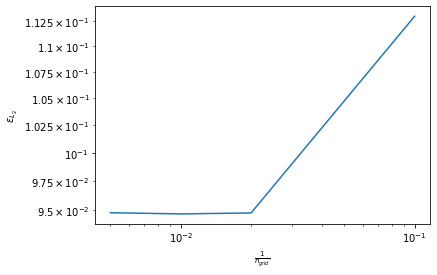

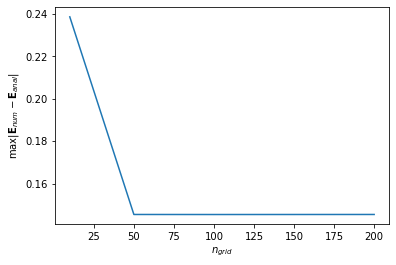

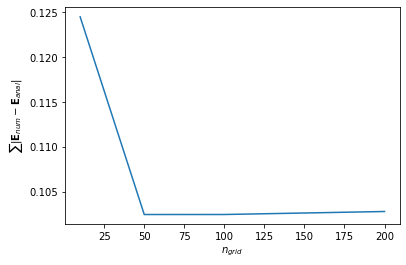

In [16]:
n_grid_t3 = np.asarray(n_grid_t3)
plt.figure()
plt.plot(1/n_grid_t3, eL2_t3)
plt.xlabel("$\\frac{1}{n_{grid}}$")
plt.ylabel("$\epsilon_{L_2}$")
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.figure()
plt.plot(n_grid_t3, ma_t3)
plt.xlabel("$n_{grid}$")
plt.ylabel("$\\max{|\\mathbf{E}_{num} - \\mathbf{E}_{anal}|}$")
plt.show()

plt.figure()
plt.plot(n_grid_t3, sa_t3)
plt.xlabel("$n_{grid}$")
plt.ylabel("$\\sum|\\mathbf{E}_{num} - \\mathbf{E}_{anal}|$")
plt.show()

In [17]:
"""
Creating a cartesian grid in 2D extended toroidally 36 degrees.
"""
ngrid_cart = 10
major_rad = 2
minor_rad = 1
x_cart, y_cart, z_cart = np.meshgrid(np.linspace(-3,3,ngrid_cart), 
                                          np.linspace(-3,3,ngrid_cart), 
                                          np.linspace(-1,1,ngrid_cart),
                                          indexing = "ij")
phi_cart = np.arctan2(y_cart,x_cart)
theta_cart = np.arctan2(z_cart, np.sqrt(x_cart**2 + y_cart**2))
# print(phi_cart)
print(np.shape(theta_cart))

# print(x_cart)

def plot_cart_coord(y_idx):
    fig_plotcartcoord = plt.figure()
    ax = fig_plotcartcoord.add_subplot()
    ax.scatter(x_cart[:,y_idx], z_cart[:,y_idx])

y_slider = widgets.IntSlider(min = 0, max = ngrid_cart-1, value = 0)
interact(plot_cart_coord,y_idx=y_slider)

(10, 10, 10)


interactive(children=(IntSlider(value=0, description='y_idx', max=9), Output()), _dom_classes=('widget-interac…

<function __main__.plot_cart_coord(y_idx)>

In [18]:
"""
Transform the noisy and radially and theta symmetric potential from first example to cartesian coordinates.
"""

def pot_rad_gauss_peak_cart(a, b, x, y, z, cp, vp, hp,n, R0, r0, theta):
    r = np.sqrt((np.sqrt(x**2 + y**2)-R0)**2 + z**2)
#     r = np.sqrt((r0*np.cos(theta))**2 + z**2)
    return a*np.exp(-b*r) + hp*np.exp(-(r-cp)**2/(2*vp)) #+ 0.01*a*np.random.normal(loc=0.0, scale=1.0, size=n)

potcart = pot_rad_gauss_peak_cart(a = 1, b = 1, 
                                  x = x_cart, 
                                  y = y_cart,
                                  z = z_cart,
                                  cp = 0.5, vp = 0.0001, hp = 0.3,
                                  n=ngrid_cart, 
                                  R0 = major_rad,
                                  r0 = minor_rad,
                                  theta = theta_cart)

def plot_cart_pot(y_idx):
    fig_plotcartcoord = plt.figure(figsize = (10,8))
    ax = fig_plotcartcoord.add_subplot()
    cont = ax.contourf(x_cart[:,y_idx], z_cart[:,y_idx], potcart[:,y_idx])
    norm = matplotlib.colors.Normalize(vmin=cont.cvalues.min(), vmax=cont.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = cont.cmap)
    sm.set_array([])
    cb = fig_plotcartcoord.colorbar(sm, ticks=cont.levels, label = "$\\Phi(x,y,\\phi)$")
    ax.set_xlabel("$x[\\mathrm{m}]$")
    ax.set_ylabel("$z[\\mathrm{m}]$")
    ax.vlines(x = [-2,2], ymin = -1, ymax = 1, label = "$R_0$")
    ax.legend()
y_slider = widgets.IntSlider(min = 0, max = ngrid_cart-1, value = 5)
interact(plot_cart_pot,y_idx=y_slider)

interactive(children=(IntSlider(value=5, description='y_idx', max=9), Output()), _dom_classes=('widget-interac…

<function __main__.plot_cart_pot(y_idx)>

In [19]:
"""
In this cell a comparison is made between the potential calculated in the toroidal coordinates
and the potential calculated in the cartesian coordinates. Furthermore an interpolation scheme is used to the potential
calulated in the toroidal coordinates which transforms the data from toroidal coordinates to cartesian. Moreover the
interpolated(toroidal to cartesian) potential is compared with the cartesian potential.
Lastly the interpolation error is quantified.
"""
from scipy import interpolate
from scipy.spatial import Delaunay

# generate the toroidal grid
ngrid_tor = 10
theta = np.linspace(0, 2.*np.pi, ngrid_tor, endpoint = False)
phi   = np.linspace(0, 2.*np.pi, ngrid_tor, endpoint = False)
c, a  = 2, np.linspace(1e-3,1,ngrid_tor)
R_tor, theta, phi = np.meshgrid(a, theta, phi, indexing = "ij")

xtor = (c + R_tor*np.cos(theta)) * np.cos(phi)
ytor = (c + R_tor*np.cos(theta)) * np.sin(phi)
ztor = R_tor * np.sin(theta)

#transform the potential values calculated on the toroidal grid
def pot_rad_peak_torcoord(a, b, r, cp, vp, hp):
    return a*np.exp(-b*r) + hp*np.exp(-(r-cp)**2/(2*vp)) #+ 0.01*a*np.random.normal(loc=0.0, scale=1.0, size=np.shape(r))

r_tor = np.sqrt( xtor**2 + ytor**2 ) - c
pot_tor = pot_rad_peak_torcoord(a = 1, b = 1, r = R_tor, cp = 0.5, vp = 0.0002, hp = 0.3)

def plot_tor_pot(phi_idx):
    fig_tor = plt.figure(figsize = (10,8))
    ax = fig_tor.add_subplot()
    ax.set_ylim(-1,1)
    cont = ax.contourf(r_tor[:,:,phi_idx], ztor[:,:,phi_idx], pot_tor[:,:,phi_idx])
    ax.scatter(r_tor[:,:,phi_idx],ztor[:,:,phi_idx], alpha = 0.1)
    

    norm = matplotlib.colors.Normalize(vmin=cont.cvalues.min(), vmax=cont.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = cont.cmap)
    sm.set_array([])
    cb = fig_tor.colorbar(sm, ticks=cont.levels, label = "$\\Phi(x,y,\\phi)$")
    ax.set_xlabel("$r[\\mathrm{m}]$")
    ax.set_ylabel("$z[\\mathrm{m}]$")
    
phi_slider = widgets.IntSlider(min = 0, max = ngrid_tor-1, value = 0)
interact(plot_tor_pot, phi_idx=phi_slider)

interactive(children=(IntSlider(value=0, description='phi_idx', max=9), Output()), _dom_classes=('widget-inter…

<function __main__.plot_tor_pot(phi_idx)>

In [20]:
# get the data on the form (x,y,z)_ijk
xyz_tor = np.zeros(np.shape(xtor) + (3,))
xyz_tor[:,:,:,0] = xtor
xyz_tor[:,:,:,1] = ytor
xyz_tor[:,:,:,2] = ztor
xyz_tor_tessalation = np.reshape(xyz_tor, (ngrid_tor**3, 3))

print(np.shape(xyz_tor_tessalation))
print(xyz_tor_tessalation[0,:])

# do the Delaunay tesselation on the grid in a toroidal intersection
# Delaunay?

#rxy_z has shape (phi, d_rxy*d_z, rxy z)
rxy_z0 = np.zeros((ngrid_tor, ngrid_tor**2, 2))
for i in range(ngrid_tor):
    rxy_z0[i,:,0] = np.sqrt(xyz_tor_tessalation[i::10,0]**2 + xyz_tor_tessalation[i::10,1]**2) 
    rxy_z0[i,:,1] = xyz_tor_tessalation[i::10,2]
print(np.shape(rxy_z0))

tri_grid2D = Delaunay(rxy_z0[0], furthest_site = False)

(1000, 3)
[2.001 0.    0.   ]
(10, 100, 2)


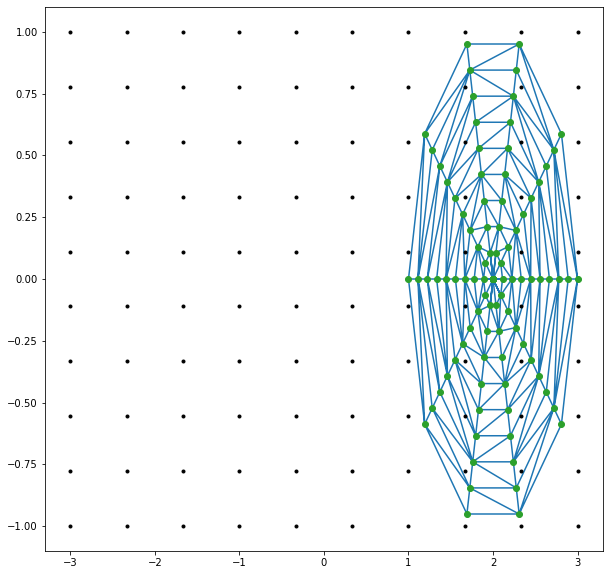

In [21]:
"""
Plot of the Delaunay tessalation in 2D. Now the task is to extend to 3D.
"""
plt.figure(figsize = (10,10))
plt.triplot(rxy_z0[0,:,0],
            rxy_z0[0,:,1], tri_grid2D.simplices)
plt.plot(rxy_z0[0,:,0], 
         rxy_z0[0,:,1], 'o')
plt.plot(x_cart[:,0], z_cart[:,0], 'k.')
plt.show()

In [22]:
%matplotlib

tri_grid3D = Delaunay(xyz_tor_tessalation, furthest_site = False)
print(np.shape(xyz_tor_tessalation))
# print(np.unravel_index(tri_grid3D.simplices,(10**3)))
print(np.shape(tri_grid3D.simplices))

print(xyz_tor_tessalation[tri_grid3D.simplices].shape)
# fig_triplot3D = plt.figure()
# ax_tri = fig_triplot3D.add_subplot(projection='3d')
# ax_tri.scatter(xyz_tor_tessalation[tri_grid3D.simplices[1000]][:,0],
#                xyz_tor_tessalation[tri_grid3D.simplices[1000]][:,1], 
#                xyz_tor_tessalation[tri_grid3D.simplices[1000]][:,2])

Using matplotlib backend: Qt5Agg
(1000, 3)
(6913, 4)
(6913, 4, 3)


In [23]:
"""
Plot the scattered toroidal grid on top of the scatterplot of the vertices of the simplices of the Delaunay
tessalation of the toroidal grid. Also a scatterplot of the cartesian grid.
"""

fig_scatter_delaunay = plt.figure()
ax_scattergrid = fig_scatter_delaunay.add_subplot(projection='3d')
ax_scattergrid.scatter(xyz_tor_tessalation[tri_grid3D.simplices][:,:,0], 
                       xyz_tor_tessalation[tri_grid3D.simplices][:,:,1], 
                       xyz_tor_tessalation[tri_grid3D.simplices][:,:,2])
ax_scattergrid.scatter(xyz_tor_tessalation[:,0], 
                       xyz_tor_tessalation[:,1], 
                       xyz_tor_tessalation[:,2], marker = 'x')
ax_scattergrid.scatter(x_cart, 
                       y_cart, 
                       z_cart, marker = '.')
ax_scattergrid.set_xlabel("$x[\mathrm{m}]$")
ax_scattergrid.set_ylabel("$y[\mathrm{m}]$")
ax_scattergrid.set_zlabel("$z[\mathrm{m}]$")

Text(0.5, 0, '$z[\\mathrm{m}]$')

In [24]:
shape_tess_coord = xyz_tor_tessalation[tri_grid3D.simplices].shape
flat_vert_tri = np.reshape(xyz_tor_tessalation[tri_grid3D.simplices], 
                           (shape_tess_coord[0]*shape_tess_coord[1], shape_tess_coord[2]))
print(flat_vert_tri.shape)
print(xyz_tor_tessalation[100])
idx_simp_found = flat_vert_tri.tolist().index(list(xyz_tor_tessalation[100]))
print(idx_simp_found)
print(xyz_tor_tessalation[tri_grid3D.simplices][int(idx_simp_found/4)])

(27652, 3)
[2.112 0.    0.   ]
4965
[[ 2.0906099   0.         -0.06583195]
 [ 2.112       0.          0.        ]
 [ 1.70864389 -1.24140245  0.        ]
 [ 1.69133894 -1.22882967 -0.06583195]]


In [25]:
"""
Point of the next cells is to find which cell each point belong to using a time efficient data structure for the search.
The implementation of time efficient data structure is last priority. First priority is to do
a clean sloat implementation.

Starting with constructing a flat array for the cartesian coordinats and calculating the euclidean distance
between the cartesian grid points and the toroidal points.
"""
xyz_cart = np.zeros(np.shape(x_cart) + (3,))
xyz_cart[:,:,:,0] = x_cart
xyz_cart[:,:,:,1] = y_cart
xyz_cart[:,:,:,2] = z_cart
xyz_cart[0,0,0,:].shape
# print()
xyz_cart_flat = np.reshape(xyz_cart, ((ngrid_cart**3, 3)))
print(xyz_cart[0,0,0,:])
print(xyz_cart_flat[0])
# print(np.reshape(np.repeat(xyz_cart_flat[0], 4), (3,4)).T)
print(xyz_cart_flat[0]*np.ones((4,3)))

def d_euc_torcart(xyz_tor, xyz_cart):
    """
    args:
     xyz_tor - xyz values for toroidal grid, dim = (n_torgrid^3, 3)
     xyz_cart - xyz values for cartesian grid, dim = (n_cartgrid^3, 3)
    out:
     - the euclidean distance between all toroidal grid points for each cartesian grid point
     - dim (n_cartgrid^3, n_torgrid^3)
    """
    if xyz_tor.shape != xyz_cart.shape:
        print("not the same shape")
    deuc = np.zeros((len(xyz_cart), len(xyz_tor)))
    for i in range(len(xyz_cart)):
        deuc[i] = np.sqrt(np.sum((xyz_tor - xyz_cart[i]*np.ones(np.shape(xyz_tor)))**2, axis = 1))
    return deuc
deuc_tor_cart = d_euc_torcart(xyz_tor = xyz_tor_tessalation, xyz_cart = xyz_cart_flat)
deuc_tor_cart.shape

[-3. -3. -1.]
[-3. -3. -1.]
[[-3. -3. -1.]
 [-3. -3. -1.]
 [-3. -3. -1.]
 [-3. -3. -1.]]


(1000, 1000)

In [26]:
"""
The point of this cell is to calculate the closest point, aka the point with the shortest
euclidean distance for each point of the euclidean grid.
"""

def closest_point(deuc, xyz_tor):
    """
    args:
     xyz_tor - dim (n_torgrid^3, 3)
     deuc - the euclidean distance between all toroidal grid points for each cartesian grid point
          - dim (n_cartgrid^3, n_torgrid^3)
    out:
     cps - closest points in cart coord on toroidal grid for each eucledian grid point
         - dim (n_cartgrid^3, 3)
    """
    idx_cp = np.zeros(len(deuc), dtype = np.int32)
    cps = np.zeros((len(deuc), 3))
    for i in range(len(deuc)):
        idx_cp[i] = int(np.where(deuc[i] == np.min(deuc[i]))[0])
#         print(idx_cp[i])
        cps[i] = xyz_tor[idx_cp[i]]
    return cps
        
cps = closest_point(deuc = deuc_tor_cart, xyz_tor = xyz_tor_tessalation)
cps.shape
print(cps[0])

[-2.27254249 -1.65109876 -0.58778525]


In [27]:
"""
The point of this cell is to locate the cell the euclidean point belongs to. In the previous
cell the closest point has been calculated, but each point has many tetrahedra connected to it.
Therefore a method to locate the cell of which the point of the toroidal grid belongs to 
needs to be implemented.
"""
import numpy.linalg
print(xyz_tor_tessalation[tri_grid3D.simplices].shape)
# print("finding cell of point with coords", xyz_cart_flat[0])

def locate_cell_ofpnt(pnt_cart, xyz_simplices):
    """
    args:
     xyz_cart - gridpoints of cartesian grid, dim (n_cartgrid^3, 3)
     xyz_simplices  - the cartesian coordinates of the vertices of each tetrahedra, dim (n_tetrahedra, 4)
    out:
     - tetrahedra in which the cartesian points are embedded
    """
    for i in range(len(xyz_simplices)):
#     for i in range(1):
        """
        xyz_simplices[i] has dim (4, 3)
        """
#         print("simplex", xyz_simplices[i])
        
        v1 = xyz_simplices[i,0]
        v2 = xyz_simplices[i,1]
        v3 = xyz_simplices[i,2]
        v4 = xyz_simplices[i,3]
#         print(np.hstack( (np.array([v1, v2, v3, v4]), np.ones((4,1))) ))
        D0 = np.linalg.det(np.hstack( (np.array([v1, v2, v3, v4]), np.ones((4,1))) ))
#         print(np.hstack( (np.array([v1, v2, v3, v4]), np.ones((4,1))) ))
        D1 = np.linalg.det(np.hstack( (np.array([pnt_cart, v2, v3, v4]), np.ones((4,1))) ))
        D2 = np.linalg.det(np.hstack( (np.array([v1, pnt_cart, v3, v4]), np.ones((4,1))) ))
        D3 = np.linalg.det(np.hstack( (np.array([v1, v2, pnt_cart, v4]), np.ones((4,1)))) )
        D4 = np.linalg.det(np.hstack( (np.array([v1, v2, v3, pnt_cart]), np.ones((4,1))) ))
        signs = np.sign([D0, D1, D2, D3, D4])
        if D0 == D1 + D2 + D3 + D4:
#             print("%i"%i)
            return xyz_simplices[i]

        
    return None
cell_found = np.zeros((len(xyz_cart_flat),4 ,3))

for i in range(len(xyz_cart_flat)):
# for i in range(1):
    cell_found[i] = locate_cell_ofpnt(pnt_cart = xyz_cart_flat[i], 
                              xyz_simplices = xyz_tor_tessalation[tri_grid3D.simplices])
print("Cell found with coordinates", cell_found)

(6913, 4, 3)
Cell found with coordinates [[[-6.81726821e-01  2.09813941e+00 -6.34354696e-01]
  [-1.81253399e+00  1.31688303e+00 -7.39921970e-01]
  [-1.42353399e+00  1.03425798e+00 -7.39921970e-01]
  [-1.78478399e+00  1.29672147e+00 -6.34354696e-01]]

 [[ 7.29283989e-01 -2.24450533e+00 -2.61564437e-01]
  [ 7.21245665e-01 -2.21976591e+00  0.00000000e+00]
  [ 7.55546551e-01 -2.32533318e+00  0.00000000e+00]
  [ 1.97804655e+00 -1.43713494e+00  0.00000000e+00]]

 [[ 9.63525492e-01 -7.00042246e-01 -5.87785252e-01]
  [ 1.36803399e+00  9.93934873e-01 -9.51056516e-01]
  [ 1.19098301e+00  0.00000000e+00 -5.87785252e-01]
  [ 1.69098301e+00  0.00000000e+00 -9.51056516e-01]]

 ...

 [[-2.05459116e+00  1.49274785e+00 -3.92052763e-01]
  [-7.84783989e-01  2.41531676e+00 -3.92052763e-01]
  [-6.92326378e-01  2.13076150e+00 -7.39921970e-01]
  [-8.12533989e-01  2.50072248e+00 -4.57296926e-01]]

 [[ 9.63525492e-01 -7.00042246e-01 -5.87785252e-01]
  [ 3.09016994e-01 -9.51056516e-01  1.22464680e-16]
  [-8.090

In [28]:
def sameside(v1, v2, v3, v4, p):
    normal = np.cross(v2 - v1, v3 - v1)
    dotv4 = np.dot(normal, v4 - v1)
    dotp = np.dot(normal, p - v1)
    print(np.sign(dotv4) == np.sign(dotp))
    return np.sign(dotv4) == np.sign(dotp)

def locate_cell_ofpnt_sameside(pnt_cart, xyz_simplices):
    """
    args:
     xyz_cart - gridpoints of cartesian grid, dim (n_cartgrid^3, 3)
     xyz_simplices  - the cartesian coordinates of the vertices of each tetrahedra, dim (n_tetrahedra, 4)
    out:
     - tetrahedra in which the cartesian points are embedded
    """
    for i in range(len(xyz_simplices)):
#     for i in range(1):
        """
        xyz_simplices[i] has dim (4, 3)
        """
#         print("simplex", xyz_simplices[i])
        
        v1 = xyz_simplices[i,0]
        v2 = xyz_simplices[i,1]
        v3 = xyz_simplices[i,2]
        v4 = xyz_simplices[i,3]
        bool_samesides = sameside(v1, v2, v3, v4, pnt_cart) & sameside(v2, v3, v4, v1, pnt_cart)
        bool_samesides = bool_samesides & sameside(v3, v4, v1, v2, pnt_cart)
        bool_samesides = bool_samesides & sameside(v4, v1, v2, v3, pnt_cart)
        
        if bool_samesides:
            return xyz_simplices[i]
    return None

cell_found_sameside = np.zeros((len(xyz_cart_flat),4 ,3))

# for i in range(len(xyz_cart_flat)):
for i in range(1):
    cell_found_sameside[i] = locate_cell_ofpnt_sameside(pnt_cart = xyz_cart_flat[i], 
                              xyz_simplices = xyz_tor_tessalation[tri_grid3D.simplices])
print("Cell found with coordinates", cell_found_sameside)

True
False
False
True
True
False
True
False
False
False
True
True
False
False
True
True
True
True
False
True
True
True
False
False
True
False
False
True
False
False
True
False
True
False
False
True
False
False
False
True
False
False
True
False
True
False
True
False
False
True
True
False
True
False
True
False
True
False
True
True
False
False
True
True
True
False
False
True
False
True
True
False
False
True
False
False
False
False
True
True
False
True
True
False
False
False
True
True
True
False
False
True
False
True
True
True
False
False
True
False
True
False
False
True
False
True
False
True
False
False
True
True
False
False
True
True
False
True
False
True
True
True
True
False
True
False
True
False
True
False
True
True
True
False
False
False
True
True
False
False
True
False
False
True
True
False
False
False
True
True
True
False
True
False
True
False
False
False
False
True
True
False
True
False
True
True
False
True
False
False
True
True
False
True
True
False
True
True
False
False
False
Fal

False
True
True
False
True
False
True
False
True
False
True
False
True
False
False
True
True
False
True
False
True
False
True
True
False
True
True
False
False
False
False
False
True
False
True
False
True
True
False
True
False
False
False
False
False
False
False
True
False
True
True
False
False
True
True
True
True
False
True
False
True
False
True
False
False
False
True
True
False
False
False
False
True
True
False
False
True
False
False
False
True
False
False
True
True
False
True
False
False
True
True
False
True
False
True
False
True
False
False
True
True
False
True
False
False
False
True
True
True
True
False
True
True
True
True
False
True
True
True
False
False
True
True
False
False
True
False
True
False
False
True
True
False
False
True
True
False
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
True
False
False
True
True
True
False
False
False
False
True
False
True
True
False
False
True
False
True
True
True
False
True
True
False
False
Fa

True
True
False
False
True
False
False
False
True
True
False
True
False
False
False
True
True
False
False
True
True
False
False
True
True
True
False
True
False
True
False
True
True
False
True
False
True
True
False
True
False
False
False
True
True
False
False
True
False
False
False
True
True
True
True
False
True
True
False
True
False
False
True
False
True
False
True
True
True
False
True
True
False
False
True
True
False
False
True
False
False
False
True
True
False
True
False
False
False
False
True
True
True
False
True
True
False
True
True
False
False
True
False
True
False
False
True
True
False
True
False
False
True
False
False
False
True
True
False
False
True
False
True
True
True
True
False
False
True
False
True
False
True
False
False
False
True
False
True
False
True
True
True
True
False
True
False
True
False
True
True
False
False
False
True
True
False
False
True
True
False
False
True
False
True
False
False
True
True
False
False
True
False
False
True
False
True
False
True
True
True
True


True
True
False
False
True
True
False
False
False
False
True
False
True
True
False
False
True
False
False
True
True
True
True
False
True
False
False
True
False
True
True
False
False
True
False
True
False
True
False
False
True
True
False
False
True
True
False
False
True
False
False
True
True
True
False
True
True
True
False
True
False
True
False
False
True
False
False
True
False
True
False
True
False
False
False
True
True
False
False
False
True
True
False
False
True
True
True
False
False
True
True
True
False
False
True
True
False
True
False
True
False
True
False
True
True
True
False
False
True
False
False
True
True
True
False
False
False
True
False
False
True
True
False
False
True
True
False
False
True
False
True
True
False
False
True
True
True
True
True
False
False
True
True
True
False
False
True
False
True
False
True
True
False
False
True
True
False
True
False
True
False
True
True
False
True
False
False
True
False
True
True
False
True
False
False
True
True
True
True
False
False
True
Tr

False
False
True
False
True
True
False
False
True
False
True
False
True
True
True
False
True
False
True
False
True
True
False
False
True
True
False
True
True
True
False
False
True
True
False
True
True
True
False
True
True
False
False
False
True
False
False
False
True
False
True
False
True
True
False
False
True
True
False
True
False
True
False
False
True
True
False
True
True
False
True
True
True
False
False
False
True
True
False
False
True
True
False
True
False
False
False
True
True
False
True
True
False
False
True
False
False
True
True
False
True
True
False
False
True
True
False
False
True
True
False
True
True
True
False
False
True
False
True
True
True
False
True
True
True
False
True
True
True
False
False
False
True
True
False
False
True
True
False
True
True
False
False
False
True
False
True
False
True
True
False
False
True
True
False
False
False
False
True
False
True
True
False
True
False
False
True
False
True
True
True
False
True
False
True
False
True
False
True
True
True
False
False

True
False
False
False
True
True
False
False
True
False
True
True
True
False
True
False
True
False
True
False
True
False
True
True
True
False
False
False
True
True
False
True
True
True
False
False
True
True
False
False
True
True
True
True
False
True
False
True
True
True
False
False
True
False
True
True
False
False
True
False
False
True
True
False
True
False
True
True
False
True
False
True
False
True
True
True
False
True
False
True
True
True
False
True
False
False
True
False
False
True
True
True
True
True
False
False
True
False
True
True
True
False
True
True
True
False
False
False
True
True
False
False
False
True
True
True
True
False
False
True
True
False
False
False
False
True
False
False
False
True
True
False
True
True
False
False
True
True
True
False
True
True
False
False
False
True
True
False
False
False
True
True
True
False
False
False
False
True
True
True
True
False
True
True
False
False
True
True
True
False
False
True
True
False
False
True
True
False
True
False
True
True
False
Fa

False
True
False
True
False
False
True
True
False
False
True
True
False
False
True
True
False
False
True
False
False
False
True
True
False
True
True
False
False
True
True
False
True
True
False
False
True
False
False
False
True
False
True
False
False
True
False
False
True
True
False
False
False
True
False
True
False
False
True
True
False
True
False
False
True
True
False
True
False
False
False
True
True
False
False
True
False
False
False
False
False
False
True
True
False
False
True
True
False
True
False
True
False
True
False
True
False
True
False
False
True
False
True
False
False
True
True
False
False
True
False
True
False
True
False
True
True
False
False
False
False
False
True
True
False
True
False
True
True
False
False
True
False
False
True
False
False
True
False
False
False
True
True
True
True
False
False
True
False
False
False
False
True
True
False
False
True
True
False
True
False
True
False
False
True
False
False
False
True
True
False
False
False
True
True
False
False
True
False
Tru

False
True
False
False
False
False
False
True
False
False
True
True
True
False
False
True
False
True
False
True
False
True
True
False
False
False
False
True
False
False
True
True
True
True
False
False
False
False
True
True
False
False
False
True
False
False
True
False
True
False
False
True
False
True
False
True
True
True
False
False
True
False
False
True
True
False
True
False
False
True
False
True
False
False
False
True
True
False
False
True
True
True
False
True
False
False
True
False
True
True
False
False
False
False
True
True
True
False
True
False
False
False
True
True
False
False
True
False
False
True
False
True
False
False
True
True
True
False
True
True
False
True
False
True
False
False
True
False
True
True
False
False
False
False
True
True
False
False
True
True
False
False
True
True
True
False
False
True
True
True
False
False
False
True
False
True
True
True
False
True
True
True
False
False
True
False
False
True
True
True
False
False
False
False
True
False
False
True
False
True
Fal

True
True
False
True
False
False
False
False
True
False
True
False
True
False
False
True
True
True
False
False
True
False
True
False
True
False
False
False
False
True
True
False
False
True
True
False
True
False
True
True
False
False
False
True
True
False
False
True
True
True
True
False
False
False
False
False
False
False
False
True
True
False
False
True
False
True
True
False
False
False
False
False
False
False
True
False
False
True
True
False
True
True
True
False
False
False
True
True
False
False
True
True
False
False
False
False
True
False
True
True
False
False
False
False
False
False
False
False
True
True
True
True
False
True
True
False
False
True
False
False
True
False
True
True
False
True
False
False
True
True
True
False
False
True
False
True
True
True
False
False
True
True
False
False
True
True
True
False
False
False
False
True
False
True
True
True
False
False
False
True
True
False
True
False
True
True
True
False
False
False
False
True
True
True
True
False
True
False
True
False
Tr

True
False
False
False
False
False
True
True
True
True
True
False
True
False
True
False
False
True
True
False
False
False
True
True
True
True
False
True
True
True
False
False
False
False
True
False
False
False
False
False
True
True
False
False
True
True
False
False
False
True
False
False
False
False
False
False
True
True
False
True
True
True
False
False
False
True
True
False
False
True
True
False
False
False
False
True
False
True
True
True
True
False
False
True
True
False
True
False
False
True
True
False
True
False
True
False
True
False
False
False
False
True
True
False
False
True
False
True
True
True
False
False
True
False
False
False
True
False
False
True
True
True
False
True
True
False
True
False
True
True
False
False
False
True
False
True
True
False
False
True
True
False
False
True
False
False
False
True
True
True
False
True
False
True
True
False
True
True
False
False
True
False
False
True
False
False
False
True
False
True
False
True
True
False
True
False
True
False
True
False
True

True
True
True
False
True
False
True
True
False
True
False
True
False
False
True
True
False
True
True
False
False
False
False
True
False
True
True
False
False
True
False
False
True
True
True
False
True
True
False
True
False
True
True
False
False
False
False
True
True
False
False
True
False
False
True
False
True
False
False
True
True
False
False
True
True
False
True
True
False
False
False
True
False
False
True
False
True
False
False
False
True
False
False
False
True
False
False
True
True
True
False
True
False
True
False
False
True
True
False
False
True
False
False
True
False
True
True
False
False
True
True
True
False
False
True
True
False
True
False
True
False
False
True
False
True
False
False
False
True
False
True
True
True
False
True
False
True
True
True
False
False
False
True
True
False
False
True
False
False
False
True
True
False
True
True
False
True
False
False
True
False
False
False
True
True
False
False
True
True
False
True
True
False
True
False
True
False
False
True
True
False
F

True
False
False
True
False
True
False
True
True
False
False
True
True
False
False
False
True
False
True
False
True
False
True
False
True
True
False
True
True
False
False
True
True
True
False
False
True
False
False
True
False
True
True
False
True
False
False
True
True
False
False
False
True
False
True
False
True
False
False
True
True
False
True
True
False
False
True
True
False
True
False
True
True
False
True
False
False
False
False
True
False
True
False
True
False
False
True
True
True
False
False
True
False
True
False
True
True
True
False
True
True
False
False
True
True
True
False
False
False
True
False
True
False
False
True
False
True
True
False
False
True
True
False
False
True
True
True
False
True
False
False
False
True
False
True
False
False
True
False
True
True
False
True
False
True
False
True
False
False
False
True
True
True
True
False
True
True
False
True
False
False
True
True
True
True
False
False
True
False
True
False
False
True
False
True
True
False
True
False
True
True
False


In [29]:
"""
Scatter plot of the vertices found for the cells that contains cartesian grid points.
"""

cell_found.shape
fig_triplot3D = plt.figure()
ax_tri = fig_triplot3D.add_subplot(projection='3d')
ax_tri.scatter(cell_found_sameside[:,:,0],
               cell_found_sameside[:,:,1], 
               cell_found_sameside[:,:,2])
ax_tri.scatter(xyz_tor_tessalation[:,0], 
               xyz_tor_tessalation[:,1], 
               xyz_tor_tessalation[:,2], 
               alpha = 0.2)


In [ ]:
def plot_tetrhedron_and_interiorpnt(coord_simplices):
    fig_foundsimplex = plt.figure()
    ax_foundsimplex = fig_foundsimplex.add_subplot(projection='3d')
    ax_foundsimplex.set_xlim(-3,3)
    ax_foundsimplex.set_ylim(-3,3)
    ax_foundsimplex.set_zlim(-1,1)
    ax_foundsimplex.set_xlabel("$x[\\mathrm{m}]$")
    ax_foundsimplex.set_ylabel("$y[\\mathrm{m}]$")
    ax_foundsimplex.set_zlabel("$z[\\mathrm{m}]$")
    for coord_simplex in coord_simplices:
        hull_found = ConvexHull(coord_simplex)
        indices_found = hull_found.simplices
        faces_found = coord_simplex[indices_found]

        for f in faces_found:
            face = a3.art3d.Poly3DCollection([f])
            face.set_color(mpl.colors.rgb2hex(np.random.rand(3)))
            face.set_edgecolor('k')
            face.set_alpha(0.5)
            ax_foundsimplex.add_collection3d(face)
plot_tetrhedron_and_interiorpnt(coord_simplices = coords_simplices)

In [34]:
b1 = True
b2 = False
b3 = b1 & b2 & b1
b4 = b3 & b1
b4

False

In [ ]:
"""
Generating synthetic time series data where the only time dependendent term is the noise.

Ideas for later extension to a more complex situation could be 
to add random peaks (random in time) which lasts in some time interval.
"""

nt = 100
potcart_timeseries = np.zeros((nt,) + np.shape(x_cart))
print(np.shape(potcart_timeseries))
for t in range(nt):
    potcart_timeseries[t] = pot_rad_gauss_peak_cart(a = 1, b = 1, 
                                                    x = x_cart - major_rad*np.cos(phi_cart), 
                                                    y = y_cart - major_rad*np.sin(phi_cart),
                                                    z = z_cart,
                                                    cp = 0.5, vp = 0.0001, hp = 0.3,
                                                    n=ngrid_cart, 
                                                    R0 = major_rad, 
                                                    r0 = minor_rad, 
                                                    theta = theta_cart)
def plot_cart_pot_as_timeseries(y_idx, t_idx):
    fig_plotcartcoord = plt.figure(figsize = (10,8))
    ax = fig_plotcartcoord.add_subplot()
    cont = ax.contourf(x_cart[:,y_idx], z_cart[:,y_idx], potcart_timeseries[t_idx,:,y_idx])
    norm = matplotlib.colors.Normalize(vmin=cont.cvalues.min(), vmax=cont.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = cont.cmap)
    sm.set_array([])
    fig_plotcartcoord.colorbar(sm, ticks=cont.levels)
    ax.set_xlabel("$x[\\mathrm{m}]$")
    ax.set_ylabel("$y[\\mathrm{m}]$")
    
y_slider = widgets.IntSlider(min = 0, max = ngrid_cart-1, value = 50)
t_slider = widgets.IntSlider(min = 0, max = nt-1, value = 0)
interact(plot_cart_pot_as_timeseries, y_idx=y_slider, t_idx = t_slider)

In [ ]:
# smoothing of potential to calulate the gradient of the potential aka the E-field

"""Ideas to smoothing or similar actions:
- using a gate on the measured potential/field which results in setting values under a threshold to zero/the smooth curve
- using edge preserving noise reduction
"""

